In [9]:
import numpy as np
import os
from glob import glob
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

In [3]:
ROOT_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

In [ ]:
feature_paths = glob(f'{ROOT_PATH}/data/processed/extracted_features/win_size_1s/*_feat.npz')
features = []
lbls = []
for feature_path in tqdm(feature_paths):
    lbl_path = feature_path.replace('_feat.', '_lbl.') 
    features.append(np.load(feature_path)['arr_0'])
    lbls.append(np.load(lbl_path)['arr_0'])


In [5]:
len(features), len(lbls)

(867, 867)

In [8]:
xtrain, xtest , ytrain, ytest = train_test_split(features, lbls, test_size=0.3, random_state=42)
xtrain, xtest = np.vstack(xtrain), np.vstack(xtest)
ytrain, ytest = np.concatenate(ytrain), np.concatenate(ytest)

In [40]:

# Get the row indices with NaN values
train_nan_row_indices = np.where(np.isnan(xtrain))[0]
test_nan_row_indices = np.where(np.isnan(xtest))[0]

# Use boolean indexing to drop the specified rows
_xtrain = xtrain[~np.isin(np.arange(xtrain.shape[0]), train_nan_row_indices)]
_ytrain = ytrain[~np.isin(np.arange(ytrain.shape[0]), train_nan_row_indices)]

_xtest = xtest[~np.isin(np.arange(xtest.shape[0]), test_nan_row_indices)]
_ytest = ytest[~np.isin(np.arange(ytest.shape[0]), test_nan_row_indices)]


In [41]:
_xtrain.shape, _xtest.shape

((9569078, 47), (4063315, 47))

In [44]:
np.unique(_ytrain, return_counts=True)

(array([0., 1.]), array([8362326, 1206752]))

In [38]:
model = XGBClassifier()
model.fit(_xtrain, _ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = model.predict(_xtest)
predictions = [round(value) for value in y_pred]

In [43]:
accuracy = accuracy_score(_ytest, predictions)
f1_score = f1_score(_ytest, predictions)
recall = recall_score(_ytest, predictions)
precision = precision_score(_ytest, predictions)

print("precision: %.2f%%" % (precision * 100.0))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 score: %.2f%%" % (f1_score * 100.0))
print("recall: %.2f%%" % (recall * 100.0))

precision: 71.73%
Accuracy: 88.31%
F1 score: 46.76%
recall: 34.68%


Feature: 0, Score: 0.00791
Feature: 1, Score: 0.02086
Feature: 2, Score: 0.02062
Feature: 3, Score: 0.00204
Feature: 4, Score: 0.00321
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.00841
Feature: 7, Score: 0.00720
Feature: 8, Score: 0.01109
Feature: 9, Score: 0.00897
Feature: 10, Score: 0.00618
Feature: 11, Score: 0.00360
Feature: 12, Score: 0.00843
Feature: 13, Score: 0.00509
Feature: 14, Score: 0.01670
Feature: 15, Score: 0.01355
Feature: 16, Score: 0.00820
Feature: 17, Score: 0.00737
Feature: 18, Score: 0.00729
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00984
Feature: 21, Score: 0.02486
Feature: 22, Score: 0.01074
Feature: 23, Score: 0.00799
Feature: 24, Score: 0.00612
Feature: 25, Score: 0.00747
Feature: 26, Score: 0.02057
Feature: 27, Score: 0.00651
Feature: 28, Score: 0.01186
Feature: 29, Score: 0.10415
Feature: 30, Score: 0.39478
Feature: 31, Score: 0.06304
Feature: 32, Score: 0.01379
Feature: 33, Score: 0.03031
Feature: 34, Score: 0.00791
Feature: 35, Score: 0.01174
Fe

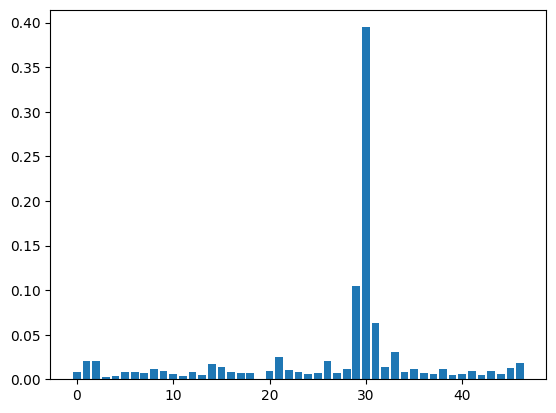

In [45]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
sorted_importance = np.sort(importance)[::-1]
importance_idx = [importance.tolist().index(importance_val) for importance_val in sorted_importance.tolist()]